In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Metric
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder, StandardScaler

class F1ScoreMetric(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.tp = self.add_weight(name='tp', initializer='zeros')
        self.fp = self.add_weight(name='fp', initializer='zeros')
        self.fn = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.round(y_pred)
        y_true = tf.cast(y_true, tf.float32)
        self.tp.assign_add(tf.reduce_sum(y_true * y_pred))
        self.fp.assign_add(tf.reduce_sum((1 - y_true) * y_pred))
        self.fn.assign_add(tf.reduce_sum(y_true * (1 - y_pred)))

    def result(self):
        precision = self.tp / (self.tp + self.fp + 1e-7)
        recall = self.tp / (self.tp + self.fn + 1e-7)
        f1 = 2 * precision * recall / (precision + recall + 1e-7)
        return f1

In [1]:
def f1_score_metric(y_true, y_pred):
    y_pred_binary = tf.round(y_pred)
    tp = tf.reduce_sum(y_true * y_pred_binary)
    precision = tp / (tf.reduce_sum(y_pred_binary) + tf.keras.backend.epsilon())
    recall = tp / (tf.reduce_sum(y_true) + tf.keras.backend.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1

C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sex'] = label_encoder.fit_transform(data2['sex'])
C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['is_smoking'] = label_encoder.fit_transform(data2['is_smoking'])


19/19 [==============================] - 0s 894us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


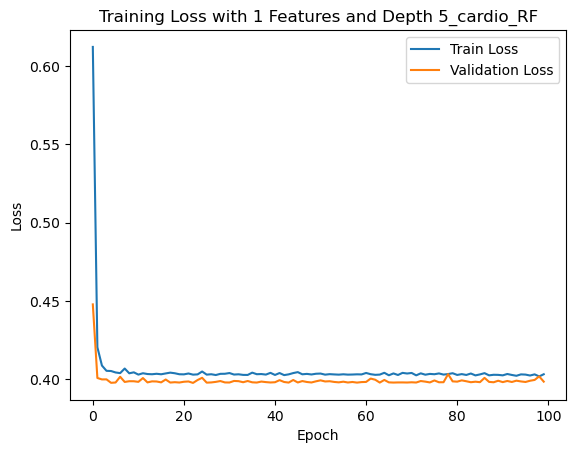

19/19 [==============================] - 0s 918us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


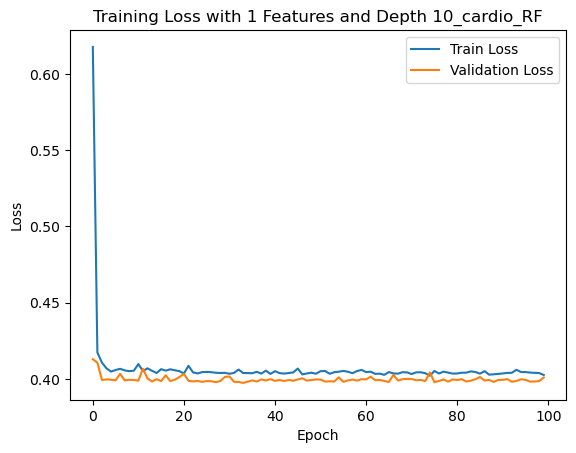

19/19 [==============================] - 0s 987us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


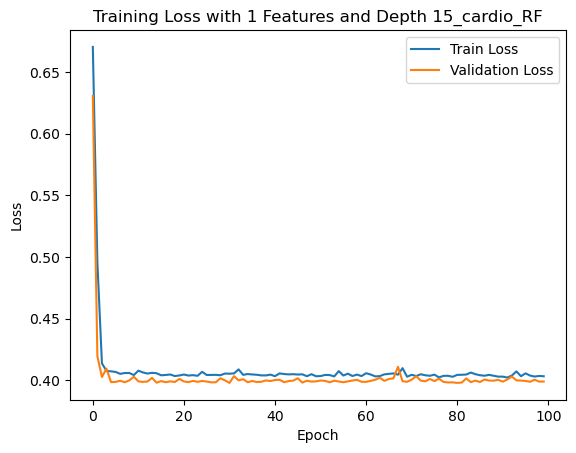

19/19 [==============================] - 0s 837us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


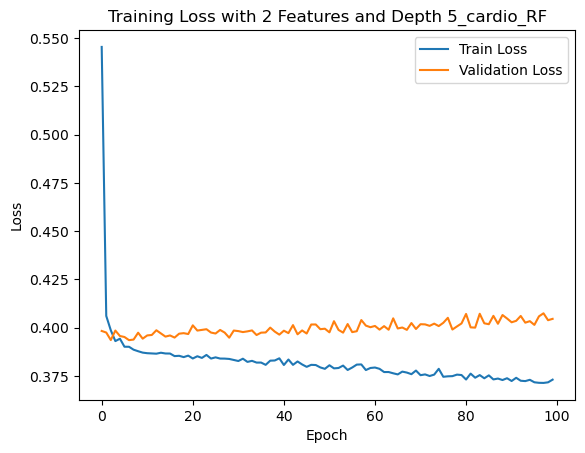

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


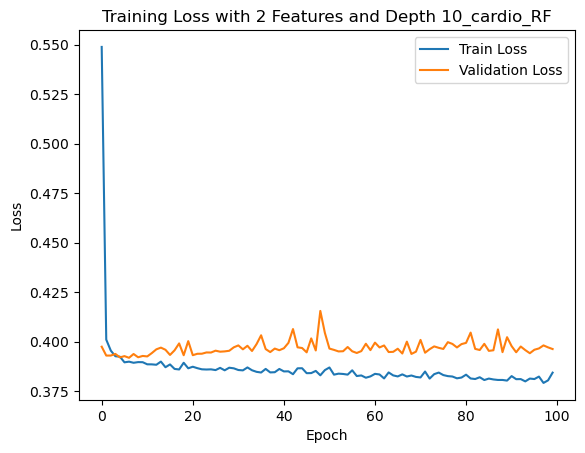

19/19 [==============================] - 0s 747us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


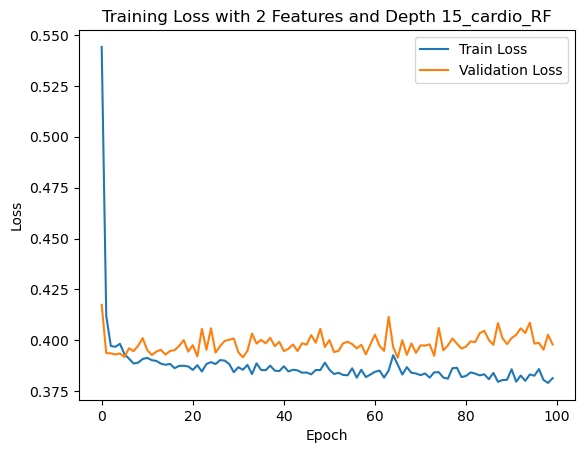

19/19 [==============================] - 0s 950us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


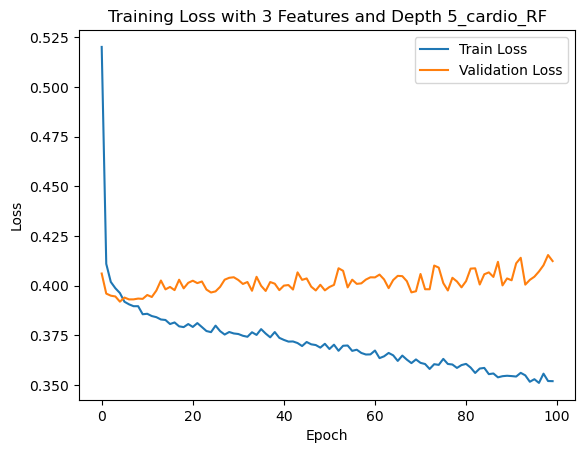

19/19 [==============================] - 0s 578us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


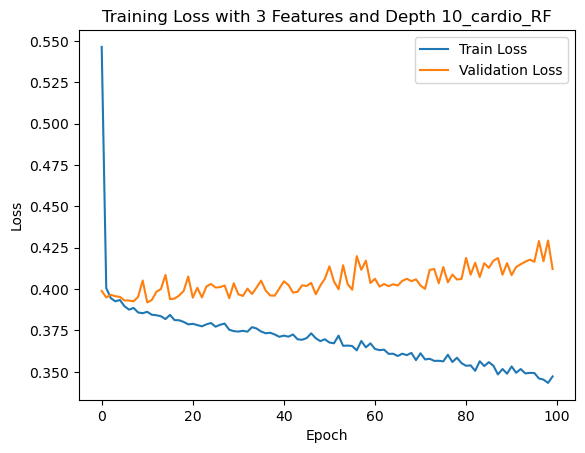

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


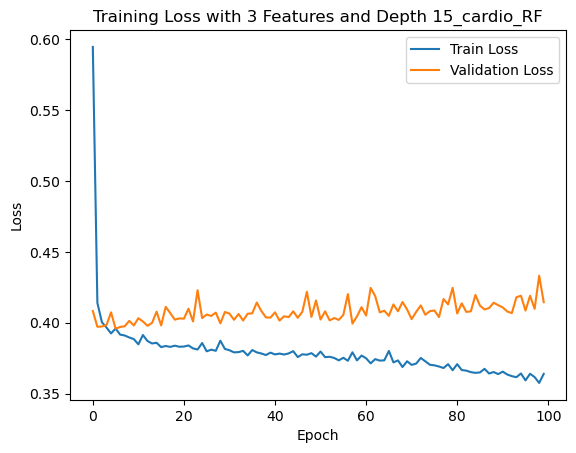

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


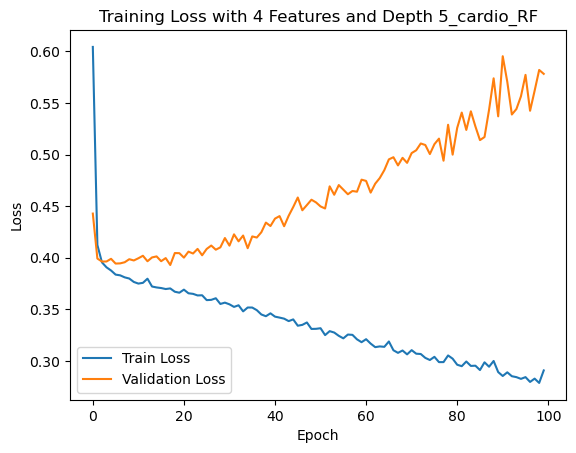

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


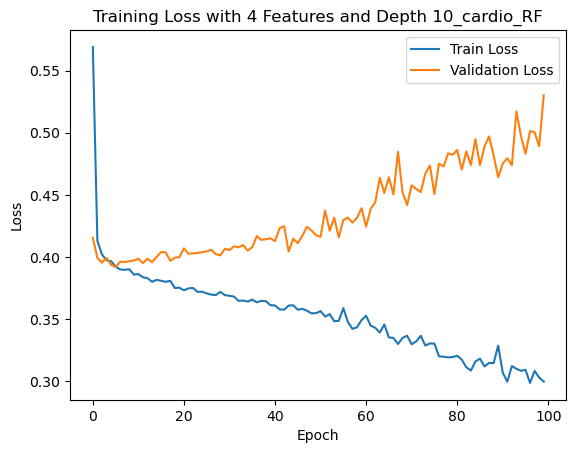

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


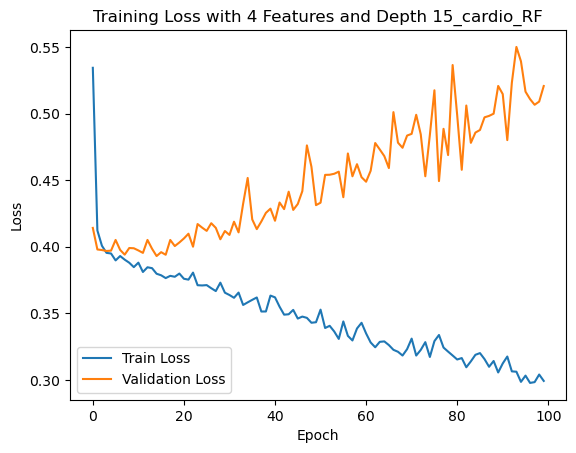

19/19 [==============================] - 0s 542us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


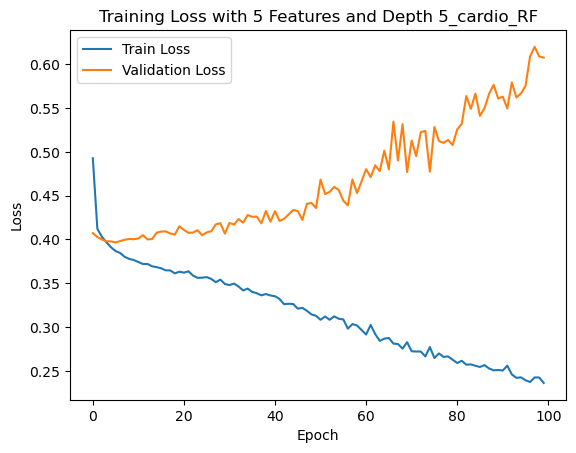

19/19 [==============================] - 0s 560us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


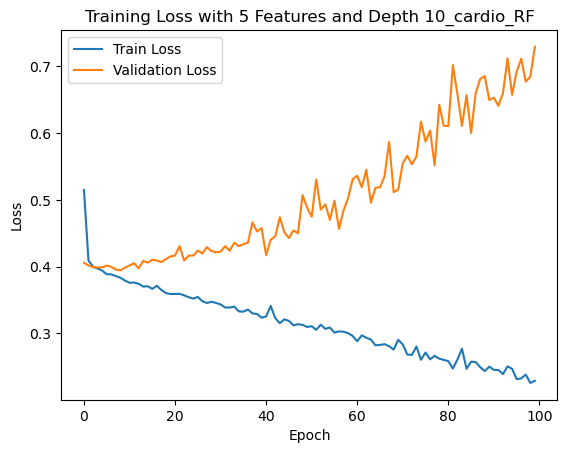

19/19 [==============================] - 0s 953us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


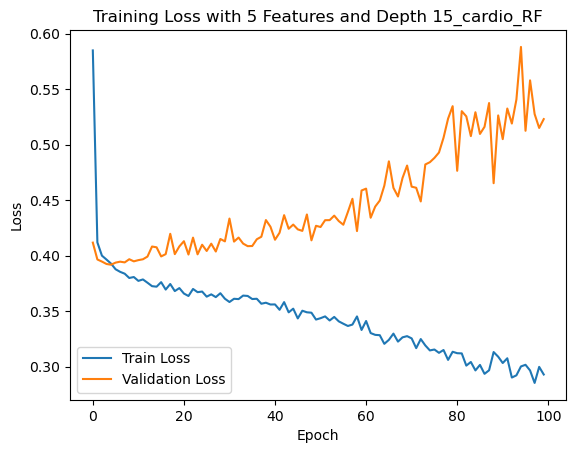

19/19 [==============================] - 0s 882us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


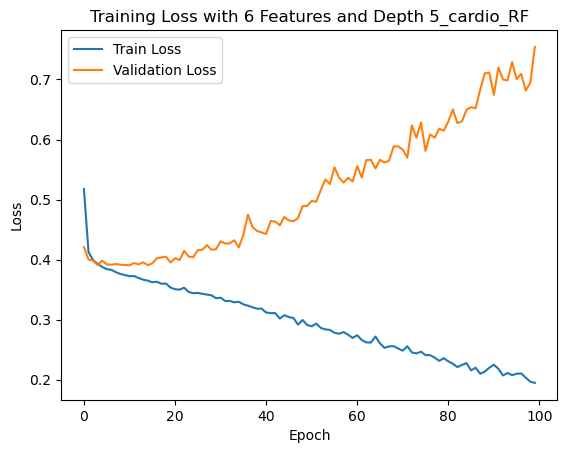

19/19 [==============================] - 0s 954us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


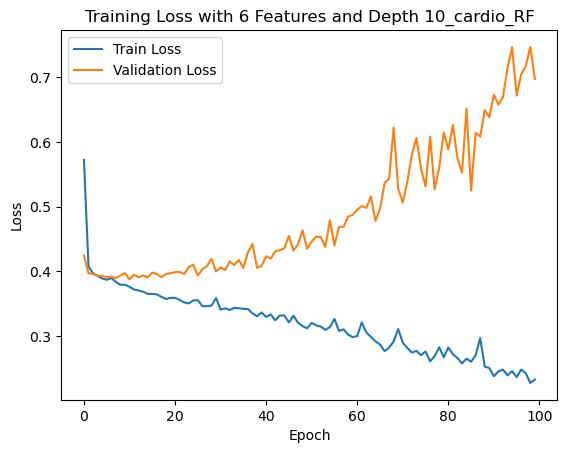

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


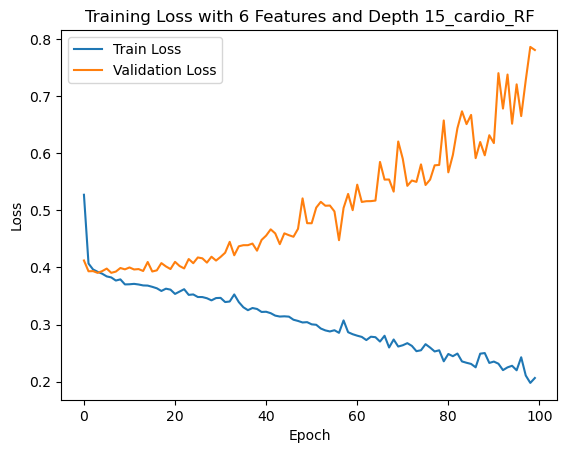

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


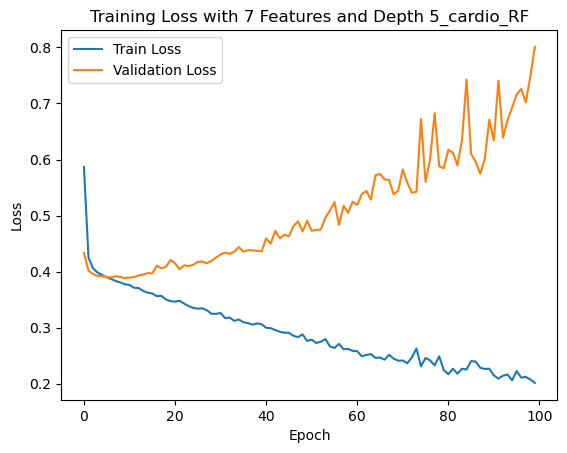

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


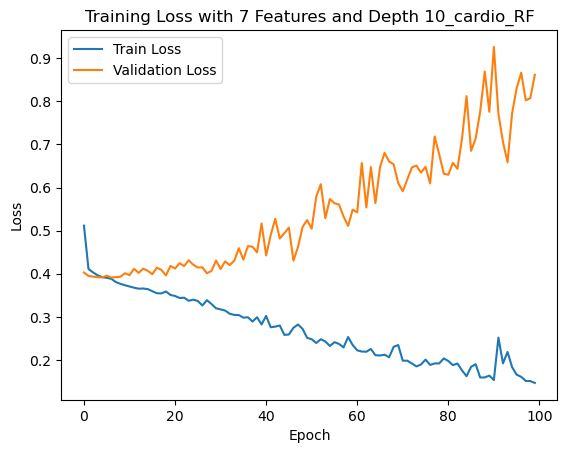

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


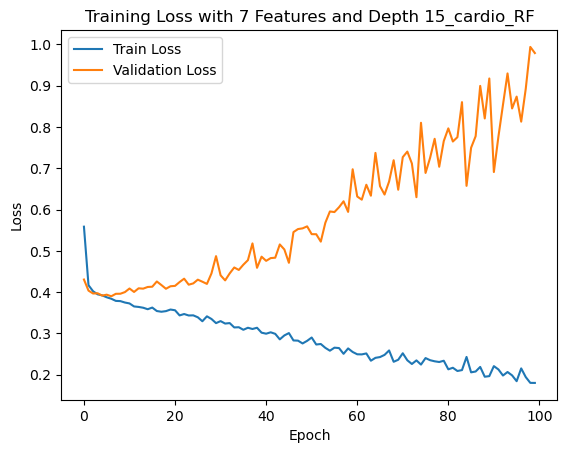

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


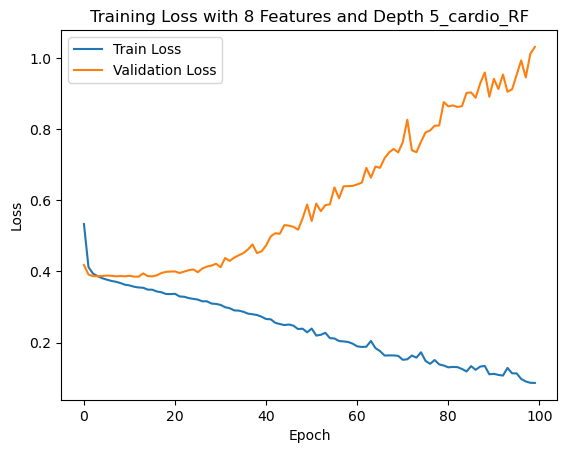

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


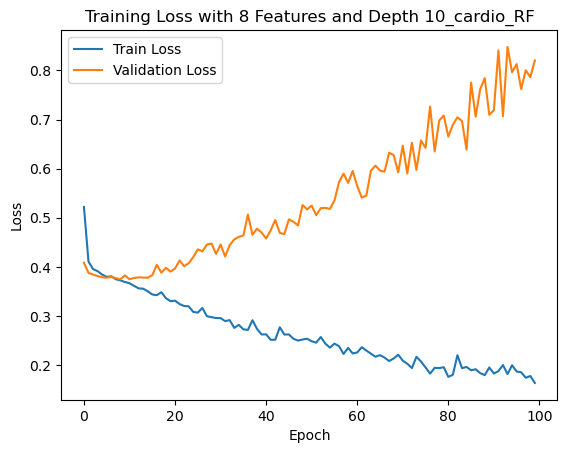

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


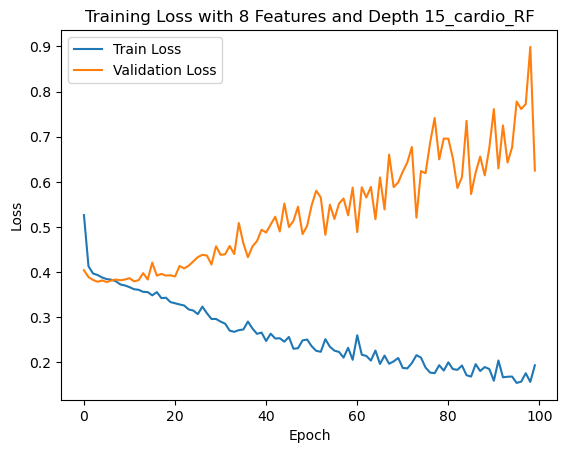

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


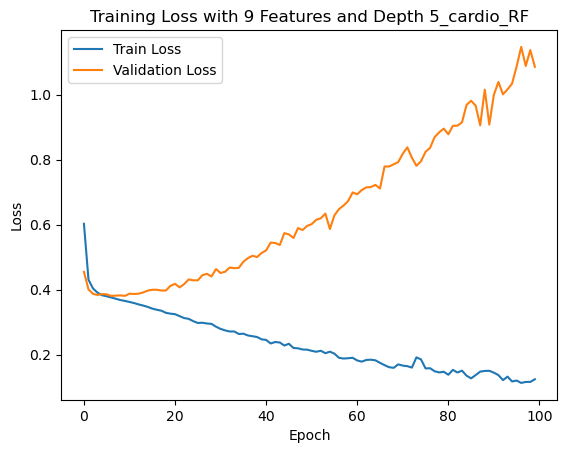

19/19 [==============================] - 0s 665us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


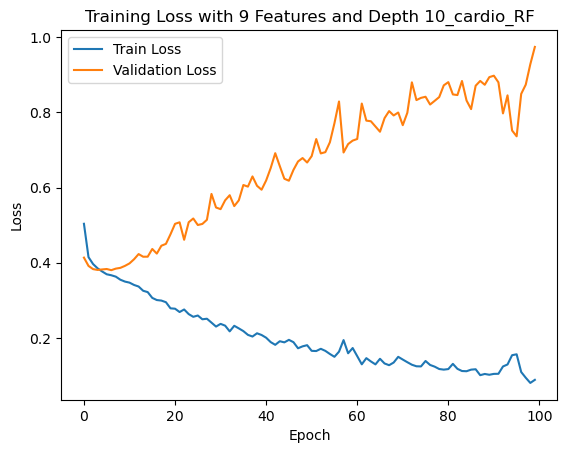

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


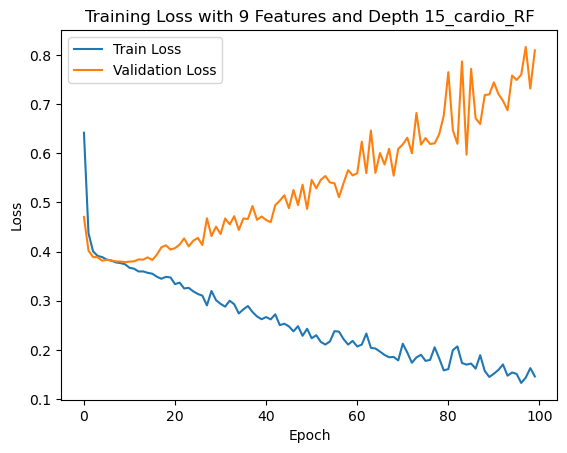

19/19 [==============================] - 0s 871us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


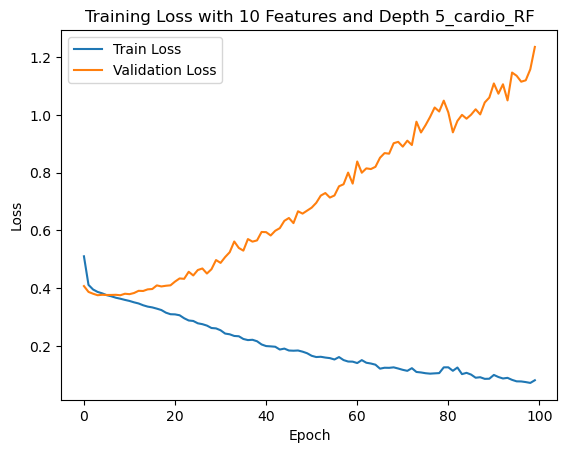

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


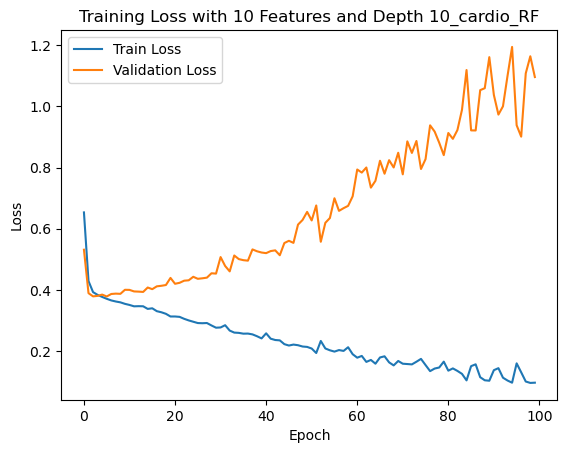

19/19 [==============================] - 0s 2ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


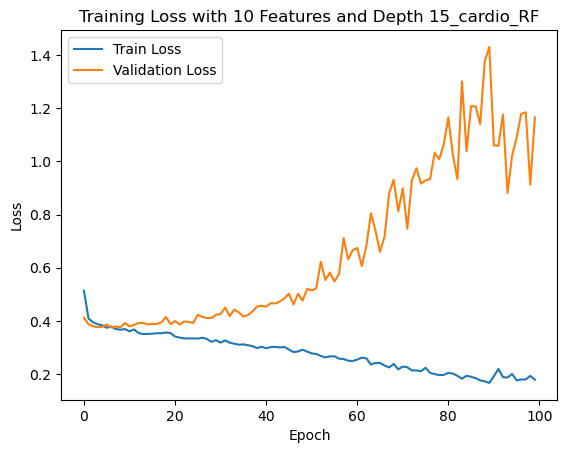

19/19 [==============================] - 0s 1ms/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


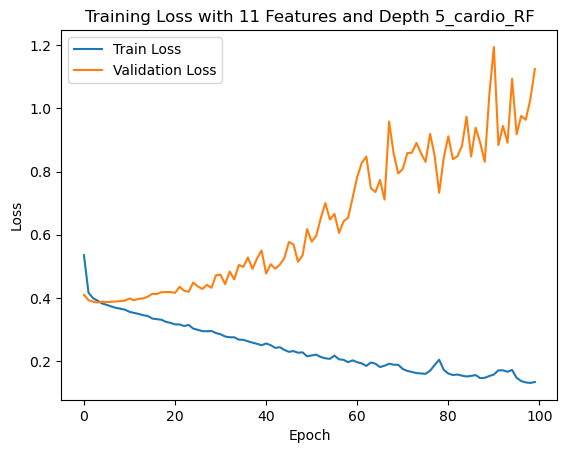

19/19 [==============================] - 0s 773us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


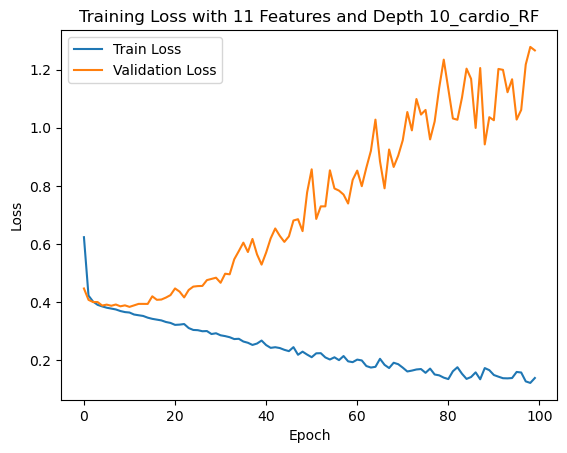

19/19 [==============================] - 0s 535us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


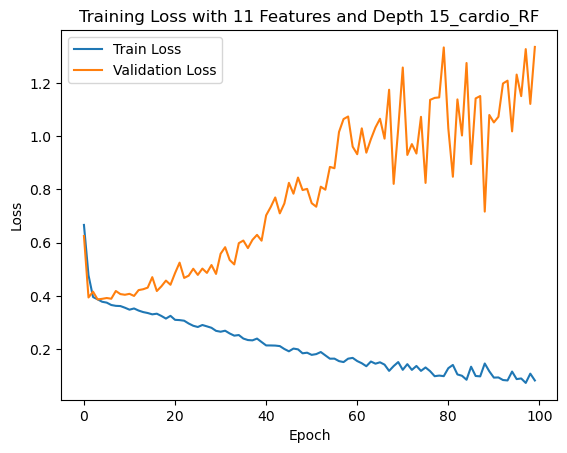

19/19 [==============================] - 0s 500us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


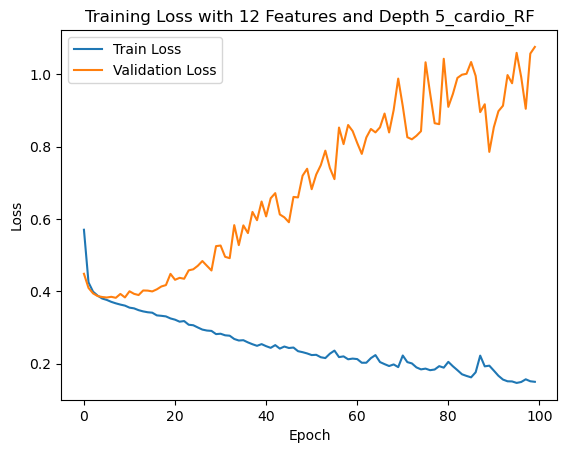

19/19 [==============================] - 0s 561us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


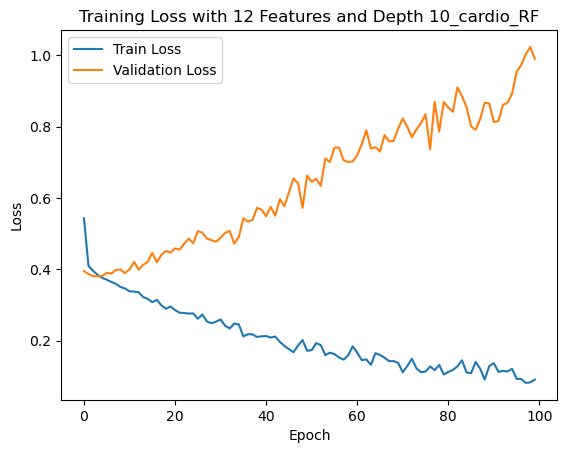

19/19 [==============================] - 0s 334us/step


C:\Users\matth\AppData\Local\Temp\ipykernel_11004\2709882899.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},


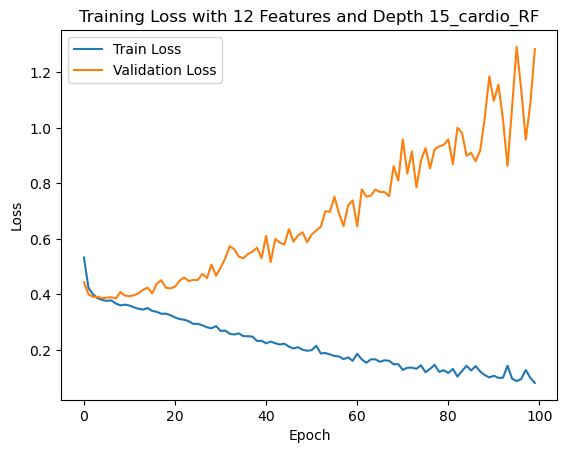

    Num Features  Depth  Final F1 Score on Test Set
0            1.0    5.0                    0.021277
1            1.0   10.0                    0.021739
2            1.0   15.0                    0.000000
3            2.0    5.0                    0.040000
4            2.0   10.0                    0.021505
5            2.0   15.0                    0.000000
6            3.0    5.0                    0.151261
7            3.0   10.0                    0.060606
8            3.0   15.0                    0.099010
9            4.0    5.0                    0.159292
10           4.0   10.0                    0.196721
11           4.0   15.0                    0.265823
12           5.0    5.0                    0.169014
13           5.0   10.0                    0.179104
14           5.0   15.0                    0.292135
15           6.0    5.0                    0.250000
16           6.0   10.0                    0.178344
17           6.0   15.0                    0.240000
18          

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset and preprocess it as you did before
file_path = 'cardio/data_cardiovascular_risk.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data2 = data.dropna()

# Convert categorical columns into numerical labels
label_encoder = LabelEncoder()
data2['sex'] = label_encoder.fit_transform(data2['sex'])
data2['is_smoking'] = label_encoder.fit_transform(data2['is_smoking'])

# Drop the 'id' column and normalize the features in X
X = data2.drop(['id', 'TenYearCHD'], axis=1)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

y = data2['TenYearCHD']

# Split the data into train and test sets, with a validation set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define different depths to try
depths_to_try = [5, 10, 15]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Num Features', 'Depth', 'Final F1 Score on Test Set'])

# Loop over different numbers of top features to use
for num_features in range(1, 13):
    # Get feature importances using a random forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    feature_importances = rf_model.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]
    
    for depth in depths_to_try:
        # Select the top num_features from the sorted_indices
        selected_features = sorted_indices[:num_features]
        X_train_subset = X_train[:, selected_features]
        X_val_subset = X_val[:, selected_features]
        X_test_subset = X_test[:, selected_features]

        # Build a neural network with specified depth
        model = models.Sequential()
        model.add(layers.Dense(32, activation='relu', input_shape=(num_features,)))
        for _ in range(depth):
            model.add(layers.Dense(16, activation='relu'))
        model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification, so 'sigmoid'

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model with early stopping and record history
        history = model.fit(X_train_subset, y_train, validation_data=(X_val_subset, y_val),
                            epochs=100, batch_size=32, verbose=0)

        # Evaluate the model on the test set using F1 score
        y_pred = model.predict(X_test_subset)
        y_pred_binary = (y_pred > 0.5).astype(int)
        f1 = f1_score(y_test, y_pred_binary)
        
        # Store the results in the DataFrame
        results_df = results_df.append({'Num Features': num_features, 'Depth': depth, 'Final F1 Score on Test Set': f1},
                                       ignore_index=True)

        # Plot the training progress
        plt.figure()
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Training Loss with {num_features} Features and Depth {depth}_cardio_RF')
        plt.legend()
        
        # Save the plot as an image
        plot_filename = f'cardio_RF_loss_plot_depth_{depth}_components_{num_features}.png'
        plt.savefig(plot_filename)
        
        plt.show()
        
# Print the table
print(results_df)


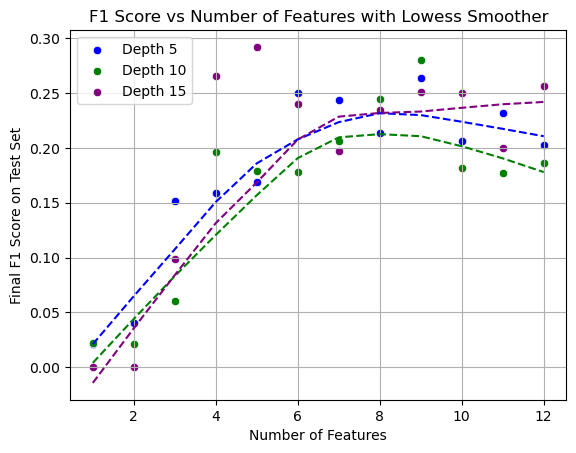

In [31]:
import seaborn as sns
import statsmodels.api as sm


# Create the scatter plot
plt.figure()

# Loop over different depths and assign a unique color
depth_colors = ['blue', 'green', 'purple']  # Add more colors if needed
for i, depth in enumerate(depths_to_try):
    depth_df = results_df[results_df['Depth'] == depth]
    sns.scatterplot(x='Num Features', y='Final F1 Score on Test Set', data=depth_df,
                    label=f'Depth {depth}', color=depth_colors[i])

    # Compute the lowess smoother
    lowess = sm.nonparametric.lowess(depth_df['Final F1 Score on Test Set'], depth_df['Num Features'])
    lowess_x, lowess_y = lowess.T

    # Plot the lowess smoother
    plt.plot(lowess_x, lowess_y, color=depth_colors[i], linestyle='--')

plt.xlabel('Number of Features')
plt.ylabel('Final F1 Score on Test Set')
plt.title('F1 Score vs Number of Features with Lowess Smoother')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("f1_score_vs_num_features_RF_split_cardio.png")

# Show the plot
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(results_df['Final F1 Score on Test Set'], results_df['Num Features'])
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7014394609270201
P-value: 1.8825227525731825e-06


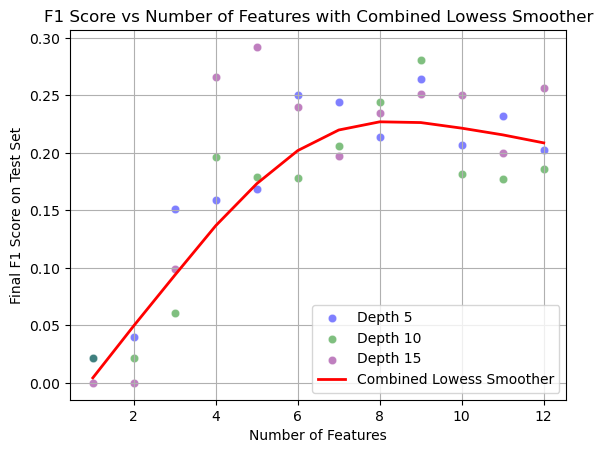

In [33]:
import seaborn as sns
import statsmodels.api as sm


# Create the scatter plot
plt.figure()

# Loop over different depths and assign a unique color
depth_colors = ['blue', 'green', 'purple']  # Add more colors if needed
for i, depth in enumerate(depths_to_try):
    depth_df = results_df[results_df['Depth'] == depth]
    sns.scatterplot(x='Num Features', y='Final F1 Score on Test Set', data=depth_df,
                    label=f'Depth {depth}', color=depth_colors[i], alpha=0.5)

# Compute the lowess smoother for all depths combined
combined_lowess = sm.nonparametric.lowess(results_df['Final F1 Score on Test Set'], results_df['Num Features'])
combined_lowess_x, combined_lowess_y = combined_lowess.T

# Plot the lowess smoother
plt.plot(combined_lowess_x, combined_lowess_y, color='red', label='Combined Lowess Smoother', linewidth=2)

plt.xlabel('Number of Features')
plt.ylabel('Final F1 Score on Test Set')
plt.title('F1 Score vs Number of Features with Combined Lowess Smoother')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("f1_score_vs_num_features_RF_cardio.png")

# Show the plot
plt.show()
